In [1]:
from IPython.display import display, Image

# The PsychoPy Version

This document details the final game. Found in the psychopy/game directory under the name `wcst.py`

This version includes almost the same core components as the game logic. But several changes had to be made.

Underneath is a overview of the game.

## Overview of the Game

### Game Setup
- **Window Settings**: A PsychoPy `window` is defined.
- **Window**: The `window` is passed into the `card class`
- **Active Rule Selection**: A rule is randomly selected from the `rules` list.
- **Deck creation**: `mainstack` and `discard stacks` are created.

### Intro loop
- **Start Screen**: Logo of game
- **Username Input**: Collects a username from the player.
- **Instructions**: Display of game instructions.

### Main Game Loop
- The game continues while there are cards in the `mainstack`.
- In each iteration of the loop:
    1. **Render Cards**:
       - The top card of the `mainstack` and the top cards of each discard stack are rendered on the screen.

    2. **User Choice**:
       - The game waits for the user to choose a `stimulus_card`, either by mouse click or keyboard input.

    3. **Card Movement**:
       - The chosen card is moved from the `mainstack` to the discard stack of the `stimulus card`.

    4. **Feedback**:
       - The game gives feedback (correct or wrong) based on the user's choice.

    5. **Tracking and Logging**:
       - data are tracked and logged for each trial.

    6. **Rule Change**:
       - If the user achieves a win streak of 5, the active rule is changed.

### Results and Saving Data
- **Calculating Results**: 
  - After the main loop ends, results (percentage correct, categories completed, and preservative errors) are calculated.
- **Displaying Results**: 
  - Displays a part of the results to the user.
- **Saving Data**: 
  - Game data is saved to a CSV file using the `save_results` function.

# Main Changes

For this version, instead of printing out text. We wanted to render out the real card images on the screen.

### Window

In psychopy instead of printing text in the terminal, the applications runs on a `window`.

The window has to be initiated, as it is a class object in psychopy.

In [2]:
#This is an psychopy class object that contains information for the screen, that will diplay the program.
window = visual.Window(size=(800, 600), fullscr=False, color='black')

NameError: name 'visual' is not defined

### Image objects in psychopy

To display images or text on the window. We first have to create them as specifics objects in psychopy.

For the creation of the image object we need to pass in the following information:
1. window
2. folder path + filename
3. size
4. position

In [ ]:
#example image
img = visual.ImageStim(window,image="folder/image.png",size=(100,100),pos=(0,0))

Then when the image is created we can use a psychopy image object method, `render()`

In [ ]:
#rendering the image on the screen
img.render()

As we want to present the card images we created in the `create_cards.py` script.

And we do not want to manually do this for all the cards. We chose to modify the class methods.

## Card Class Changes

We wanted to automate the image object creation in the card class.

In [ ]:
class Card:

    image_path = "../cards/"
    card_size = (128,176)
    _pos = None
    window = None
    
    @classmethod
    def set_window(cls,window):
        cls.window = window
    
    def __init__(self,number,shape,color):
        self.number = number
        self.shape = shape
        self.color = color
        self.psypy = self.create_psychopy()
    
    def render(self):
        self.psypy.draw() 
        
    
    def get_filename(self): # property possibility
        fname = os.path.join(self.image_path, "%i_%s_%s.png"%(self.number, self.shape, self.color))
        return fname
    
    def create_psychopy(self, position=(0,0), **kwargs):
        
        if not Card.window:
            raise ValueError("The window attribute for Card is not set. Use Card.set_window() and give the class a valid psychopy window configuration.")
        ppy_repr = visual.ImageStim(Card.window,image=self.get_filename(),size=(self.card_size),pos=(position), **kwargs)
        return ppy_repr
    ...
        

        
        

To automate the process we had to solve some problems. 

Some of this will be **simple**, because the process will be same for all the cards. A **challenge** is when each cards image object has to receive different information.

#### Simple
1. **Image Path**
2. **Size**
3. **Window**

#### Challenging
4. **The Image Name:** Will change depending on the card.
5. **The Position:** Will depend on what stack the card is currently in.




The simple problems are solved like this:
    
1. **Filename**: We specify the image path in the card class.
2. **Card Size**: We specify the size in the card class
    

In [ ]:
class Card:
    image_path = "../cards/"
    card_size = (128,176)
    ....

3. **Window**: We create a classmethod named set_window(). It the picks up the window object and stores it as a class variable.

In [ ]:
class Card:
    ....
   @classmethod
    def set_window(cls,window):
        cls.window = window
    ....    

3.**Window**: Here is an example of how the window object is passed into the card class as a variable.

In [ ]:
# Window settings
window = visual.Window([1800,1200], monitor="testMonitor", units="pix")
Card.set_window(window) # Pass in the window for the card class

The challenging problems are solved in a less straightforward fashion.

4.**Filename**

We are able to retrieve the filename because, in the `create_cards script` we named the files in a systematic manner. The name is always the number_shape_color.png.

We use the attributes of the cards `shape`,`name`,`color` and check each of their value. Depending on this we name the file.


In [ ]:
 def get_filename(self): # property possibility
        fname = os.path.join(self.image_path, "%i_%s_%s.png"%(self.number, self.shape, self.color))
        return fname

When this method is used on a card object it will return to us a string that leads to the png file of that specific card.

**Example**: "../cards/1_circle_red.png"

#### Creating the image object from the cards.

Now we have everything except the position information to create the image objects from the card.

For now we postpone this problem by giving all image object the location: (0,0)
We do this because the cards themself do not contain the information on where the cards should be rendered on the screen. This is information that is given by the stack.

The window, the image path + filename, the cardsize and the position is all used in this method to create the final image object from the card.

In [ ]:
def create_psychopy(self, position=(0,0)):
        ...
        ppy_repr = visual.ImageStim(Card.window,image=self.get_filename(),size=(self.card_size),pos=(position))
        return ppy_repr

Then we added this method to the __ init __  function.
This way everytime a card object is initialized it will run the create_psychopy() method.

In [ ]:
    def __init__(self,number,shape,color):
        self.number = number
        self.shape = shape
        self.color = color
        self.psypy = self.create_psychopy()

#### Sequence

The sequencing of this is a bit complicated because of its object oriented approach.

When a card is created.

First the window has to be passed into the class

In [ ]:
window = visual.Window([1800,1200], monitor="testMonitor", units="pix")
Card.set_window(window) # Pass in the window for the card class

We then create a card with the card class.

In [ ]:
card = Card(1,'triangle','red')

It will assign: 1 = number, 'triangle' = shape, 'red'= color. Simple.
But then when it is asigning the value for psypy.

In [ ]:
class Card:
    def __init__(self,number,shape,color):
        self.number = number
        self.shape = shape
        self.color = color
        self.psypy = self.create_psychopy()
    ...




It will assign the psypy attribute with the value that is returned from the create_psychopy().
The create_psychopy() method calls upon the get_filename() method to locate the filename.

And the get_filename uses the values from the card attributes: number, shape and color to locate the file.

In [ ]:
class Card:
    ...
    def create_psychopy(self, position=(0,0)):
        ...
        ppy_repr = visual.ImageStim(Card.window,image=self.get_filename(),size=(self.card_size),pos=(position))
        return ppy_repr

This complex process results in a simple code. When we run the gameloop.

#### Rendering

Now in psychopy, when we want to render something on the screen. 
We use an mehtod that is available for the psychopy image objects.

And now because each card has a psychopy image object called psypy, we can just use the draw function on it.

In [ ]:
   class Card:
        
    def render(self):
        self.psypy.draw()

now when a card is called to render:

In [ ]:
 card.render()

It will be printed on the screen.

# Stack Class Changes

The main changes to the classes are that they now include positional information for the cards.

To the parent class Stack. The only changes are the render method.

In [ ]:
class Stack():
     ...
    
    def render(self):
        if self.list_of_cards:
            card = self.list_of_cards[-1]
            card.pos = (self.xpos, self.ypos)
            card.render()


1. It checks if there are any cards in the stack.
2. Then takes card on top of the stack.
3. Assigns it with a position
4. Preforms the card level render method on it.

### Changes to child class MainStack

The only change here is that now, it includes position data.

In [ ]:
class MainStack(Stack):
    xpos = 0
    ypos = -200
    ...

### Changes to child class DiscardStack

As in the MainStack, we include information on the position of the stack.

But because this is a multistack (it contains two cards locations per stack).
We have to assign it multiple positions. 

Additionally, we are rendering some text above the stack so we have to specify the text information as well.

In [ ]:
class DiscardStack(Stack):
 
    ypos_stimcard = 400
    ypos_discard = 200
    
    stimdesign  = {
    'font': 'Arial',
    'height': 42,
    'color': 'white',
    'bold': True
    }
    ...

At the class level, we define the variables that stay the same regardless of what which discard stack is created. 

Because all of the stimulus cards and discard cards have the same y-position we give it here.

Also, we define a template for the text stimulus we want to render top of the stimulus cards.

In [ ]:
class DiscardStack(Stack):
    
    def __init__(self, num):
        self.list_of_cards=[]
        self.stimulus_card=None
        if num==1:
            self.xpos = -300
            self.stimulus_card=Card(1, "triangle", "red")

        elif num==2:
            self.xpos = -100
            self.stimulus_card=Card(2, "star", "green")
           
        elif num==3:
            self.xpos =  100
            self.stimulus_card=Card(3, "square", "yellow")
          
        elif num==4:
            self.xpos =  300
            self.stimulus_card=Card(4, "circle", "blue")
            
        self.stimulus_card.pos = (self.xpos, self.ypos_stimcard)
        ...

Depending on the number of the stack, we assign a different x - position.

Because the `DiscardStack` is a multistack, the render method is also customized.

In [ ]:
class DiscardStack(Stack):
    
    def render(self):
        # render the stimulus card
        self.stimulus_card.pos = (self.xpos, self.ypos_stimcard)
        self.stimulus_card.render()
        # if there are cards in the discard stack render the top card
        if self.list_of_cards:
            card=self.list_of_cards[-1]
            card.pos = (self.xpos, self.ypos_discard)
            card.render()
        # render the number on top of the stack
        add = {
        'text': self.stimulus_card.number,
        'pos': (self.xpos, self.ypos_stimcard + 110)
        }
        design = DiscardStack.stimdesign.copy()
        design.update(add)
        stim_text = visual.TextStim(window, **design)
        stim_text.draw()

The `render()` method.
   
   1. Updates the position of the cards.
   2. Renders the stimulus card and the top discard pile card.
   3. Draws additional text above the stimulus card. Depending on the card number of the stimulus card.
    

### Positioning of the cards

How the positioning of the card is solved requires some additional explanation. In essence.

1. When a card is created it always gets (0,0) as it position. This is in the middle of the screen.
2. When a card is asigned to a stack it gets a new position.
3. The updating of the position initiates a setter method that updates the cards position value at the card level.
4. The updating of the position also triggers an update of the psypy position.
5. When the card is finally rendered it will now be rendered at the new position that was given by the stack.

#### Example

When a card is in the mainstack.

In [ ]:
class MainStack(Stack):
    
    xpos = 0
    ypos = -200

And when the mainstack uses the render method that it inherited from the Stack class.

In [ ]:
class Stack:
    
    def render(self):
        if self.list_of_cards:
            card = self.list_of_cards[-1]
            card.pos = (self.xpos, self.ypos)
            card.render()

The position values of the card are changed.

This change in turn triggers the setter at the card level.
It ultimately changes the card position value and the psychopy image object position value.

In [ ]:
class Card:
    ..
    @property
    def pos(self):
        return self._pos
    
    @pos.setter
    def pos(self, value):
        self._pos = value
        self.psypy.pos = value

Then the rendering happens on this updated `psypy` object.

In [ ]:
class Card:
    
    def render(self):
        self.psypy.draw()

# Mouse support

In the initial game logic, we had implemented a keyboard based choice system for our game.

Because we now had a visual display we also wanted to include mouse support. So that choices could be made with the mouse.

Because psychopy has a good mouse module. Most of the work is done inside psychopy and we only need to add little code to implement the mouse functions.

To do this.
We added a mehtod to the card class that gets the location cordinates of the card.
This method is defined as a property so that we might access the location cordinates as just another attribute of the card.

In [ ]:
class Card:
    
    @property
    def rect(self):
        """A method that gives the cordinates of the card: Used when looking for mouse clicks"""
        width, height = self.card_size
        xpos, ypos = self.psypy.pos
        left = xpos - width / 2
        right = xpos + width / 2
        top = ypos + height / 2
        bottom = ypos - height / 2

        return [left, top, right, bottom]
    
    

In the gameloop we first initialize a mouse object using one of psychopys inbuilt modules.

In [ ]:
mouse = event.Mouse()

Then we make a loop.
1. Checks for clicks
2. If there is a click it will get the mouse position
3. Get the position of the `simulus cards`
4. Check if the mouse click happened in inside the any of the position cordinates of the stimulus cards.
5. If this was the case it will assign a choice based on what stimulus card was clicked.
6. When a choice is registered made it will brake the loop.

In [ ]:
 while choice is None:
        # Check for mouse click first
        if mouse.getPressed()[0]:  # [0] corresponds to the left mouse button
            mouse_pos = mouse.getPos()
            for i, dstack in dstacks.items():
                rect = dstack.stimulus_card.rect
                if (rect[0] <= mouse_pos[0] <= rect[2] and rect[1] >= mouse_pos[1] >= rect[3]): #left,top,right,bottom
                    choice = i
                    break

# Data tracking and storage

The functions help store meaningfull data from the game are the following:

Functions:
   1. track()
   2. matched_category()
   3. save_results()
   4. results()

In [ ]:
def track(data_point, trial):
    # Follow the sequence given in the save_results function
    trial.append(data_point)
    return trial

To track the data from the game we made a tracking function.

1. takes in a data point and the trial list.

### Data tracking: Example

Here is a use case of the `track()` function in the gameloop.

In [ ]:
    # Pop the top card from the mainstack and put it in the right discard pile
    card = mainstack.pop()
    track(card.__repr__(),trial) # Here the tracker collects the hand card
    
    dstacks[choice].add(card)
    track(dstacks[choice].stimulus_card.__repr__(),trial) # Here the tracker collects the chosen stimulus card.

At the end of the loop. We command the trial to be stored into the game data.

In [ ]:
game_data.append(trial)

When the game is over the game_data will include multiple lists:

Each list represents one trial (one round of the game).

Each list contains the following information:

In [ ]:
["card", "chosen card", "success", "matched on categories", "active rule", "win streak"]

At the end of the game. We run the save_results() function.

To it we pass in the game_data, the folder path and the filename.

This is the function that saves the game data in csv format.

In [ ]:
def save_results(data, results_destination, filename):
    index = ["card", "chosen card", "success", "matched on categories", "active rule", "win streak"]
    game_data_dicts = []

    for trial_data in data:
        trial_dict = {}
        for i, field in enumerate(index):
            trial_dict[field] = trial_data[i]
        game_data_dicts.append(trial_dict)

    df = pd.DataFrame(game_data_dicts)
    output_filename = f"{filename}_data.csv"
    df.to_csv(os.path.join(results_destination, output_filename), index=False)

In [ ]:
save_results(game_data, results_destination, filename)    

### Results: Datafile

The results are saved, in an excel friendly way. 

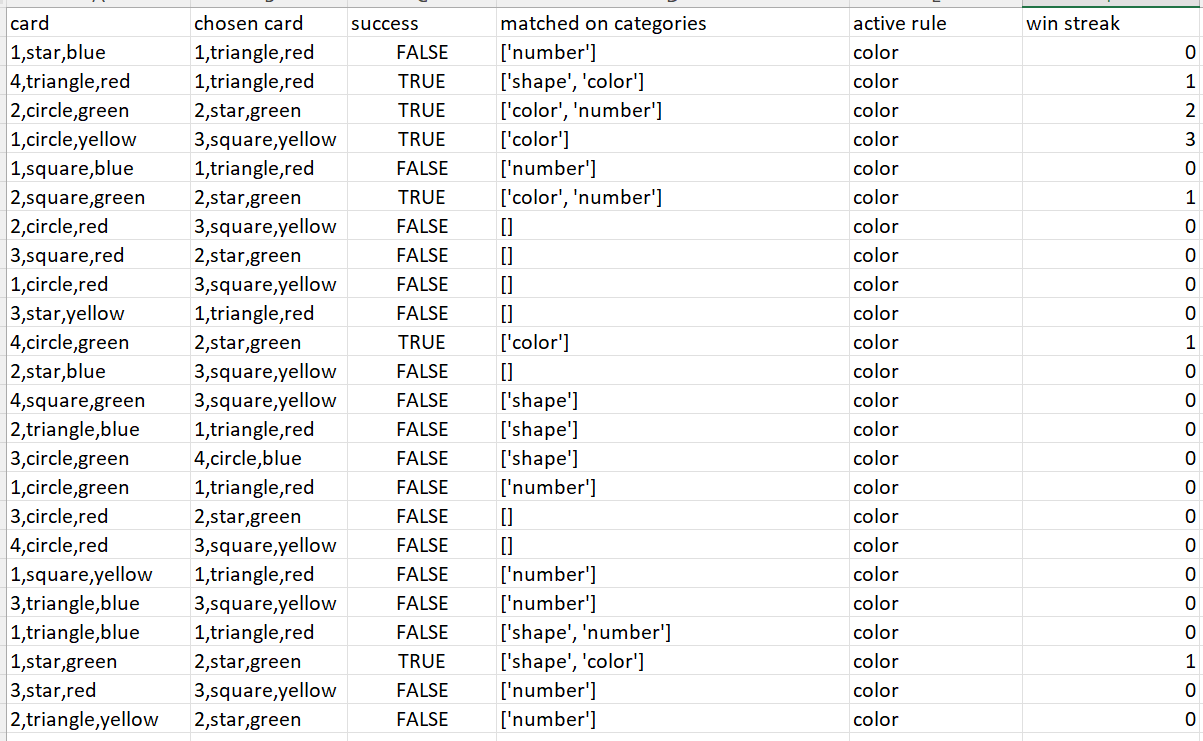

In [3]:
display(Image(filename="../img/results_example.png", width=500, height=500))

### Results: End of game screen

In [ ]:
To make the game fun we also added a end of game screen, where the player will see some data from their game.

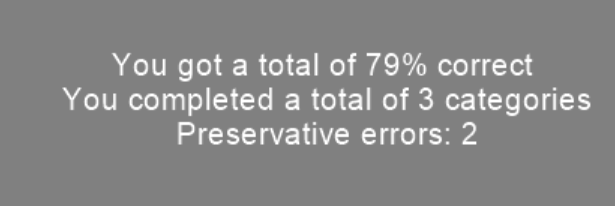

In [4]:
display(Image(filename="../img/end_example.png", width=300, height=300))

To do a quick this we needed to preform a quick analysis of the data in the game.

Its done by a function named `results()`:

In [ ]:
def results(data):
    holder = "blank"
    preservative_error = 0
    index = ["card","chosen card", "success", "matched on categories", "active rule",  "win streak"]
    # procent_correct
    win_list = [item[2] for item in data]
    total_correct = sum(win_list)
    total_number = len(win_list)
    procent_correct = total_correct /total_number * 100
    
    # Categories completed
    win_streak = [item[5]for item in data]
    completed = [item[5] for item in data if item[5] == 5]
    completed_categories = len(completed)
    
    # Error type
    active_rule = [item[4] for item in data]
    matched_categories = [item[3] for item in data]
    
    for index, (win, rule, matched, streak) in enumerate(zip(win_list, active_rule, matched_categories, win_streak)):
        print(index)
        if streak == 5:
            holder = rule
        if win == False and holder in matched:
            preservative_error += 1
    
    
    
    return procent_correct, completed_categories, preservative_error
    

This function takes in the datafile and returns us some data that might be fun for the user.